In [2]:
using PyPlot
include("../saltsolver.jl")
include("../passive.jl")

function mirrorflip(E)
    Eaug = [E[end]; E]
    flipdim(Eaug,1)[2:end]
end

function coefs(f, Es)
    dot(Es[1], f)/norm(Es[1])^2, dot(Es[2], f)/norm(Es[2])^2
end

LoadError: LoadError: LoadError: invalid redefinition of constant Laser
while loading /Users/davidliu/Desktop/salt_degeneracy_paper/saltsolver.jl, in expression starting on line 1
while loading In[2], in expression starting on line 2

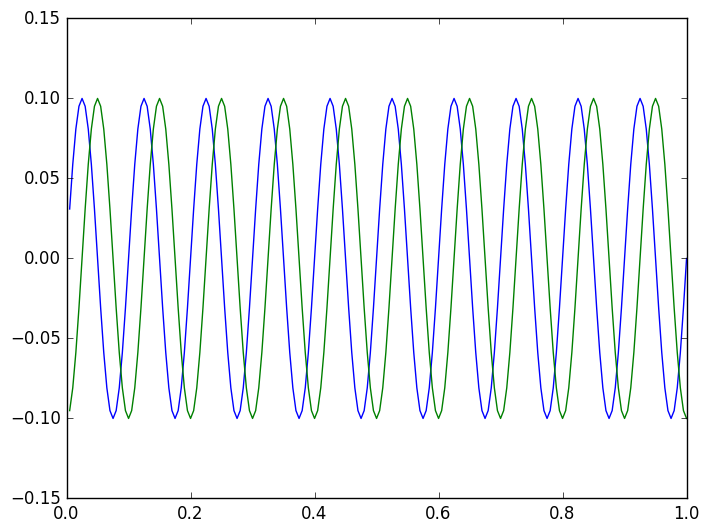

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3192e6ad0>
 PyObject <matplotlib.lines.Line2D object at 0x3192e6cd0>

In [25]:
# this is a test of the unstable circulating mode in Rotter/Burkhardt, Fig. 1
N = 200
L = 1.0
h = L/N
x = linspace(h, L, N)
F = ones(N)
M = zeros(N, N)
laplacian!(J) = periodic!(J, h)
laplacian!(M)
Λ, X = eig(M)
reverse!(Λ)
X = X[:, reverse(1:N)]
ωs = √abs(Λ);
ieig = 20
ω = ωs[ieig]
E = X[:, ieig] + im * X[:, ieig+1]
plot(x, real(E), x, imag(E))

In [26]:
ωa = 61.0
γ⟂ = 1.0
ɛ = (1 + im*0.0002)^2 * ones(N)
las = Laser(ɛ, F, ωa, γ⟂)
pmd = PassiveMode(copy(E), ω)
D = 0.00068
passive_solve!(laplacian!, pmd, las, D, isprint=true)
imag(pmd.ω)

|f| = 20.458556883519126
|f| = 0.0019254614848314322
|f| = 9.50593439262974e-11


-0.006355271326704995

In [22]:
Dt = passive_threshold!(laplacian!, pmd, las, (D, D*1.05))
ωt = real(pmd.ω)
println("imag(ω) = ", imag(pmd.ω))

imag(ω) = -1.309737288097242e-11


In [29]:
zeros(Complex{Float64}, 2, 3)

2x3 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im

In [43]:
γpar = 2e-3
ds = linspace(1.0, 8, 12)
Λs = zeros(Complex{Float64}, length(ds), 4)
for (i,d) in enumerate(ds)
    println("i = ", i)
    D = Dt*(1+d)
    csq = d
    md = Mode(copy(pmd.E), ωt, csq)
    solve!(laplacian!, md, las, D)
    Λs[i, :] = smallest_stability_eigs(laplacian!, 
            sqrt(md.c²) * md.E, md.ω, D, γpar, las.ɛ);
end

i = 1
i = 2
i = 3


LoadError: LoadError: InterruptException:
while loading In[43], in expression starting on line 4

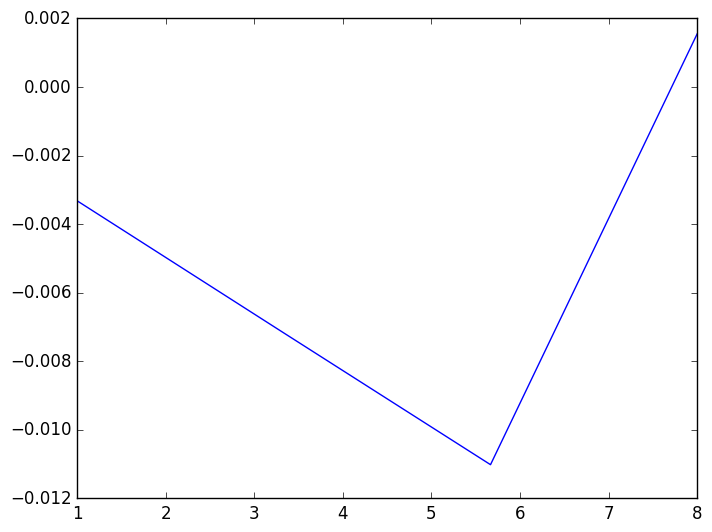

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31dec59d0>

In [41]:
# plot all four eigenvalues as function of d, probably
# will not be linear, but see how it becomes positive

plot(ds, real(Λs[:, 2]))